In [285]:
import numpy as np
import gzip
import matplotlib.pyplot as plt
from astropy.io import fits as fits
from astropy.stats import sigma_clip
import lightkurve as lk
from lightkurve import SFFCorrector
from lightkurve import search_tesscut
import astropy.units as u
from astropy import stats
import time as datetime
from lightkurve import periodogram
from astropy.convolution import Box1DKernel, convolve
from tqdm import tqdm_notebook as tqdm
import numpy.linalg as lin
import scipy.linalg as sclin
from scipy import stats as st
import pandas as pd

from scipy import ndimage as nd
import re
plt.rcParams.update({'figure.max_open_warning': 0})
import warnings
warnings.filterwarnings("ignore")

#Import all needed packages 

In [241]:
cd /Users/hamil/Documents/TESSFiles 

C:\Users\hamil\Documents\TESSFiles


In [319]:
cand1 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00031273263-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand2 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00031273263-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand3 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00031928890-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand4 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00031928890-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand5 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00031963492-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand6 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00031963492-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand7 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00033734375-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand8 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00033734375-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand9 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00231833061-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand10 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00231833061-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand11 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00260504147-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand12 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00260504147-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand13 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00370324073-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand14 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00425906447-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand15 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00425906447-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand16 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00033767523-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand17 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00033767523-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand18 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00179371765-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand19 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00179371765-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand20 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00179985566-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand21 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00270411008-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand22 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00271975434-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand23 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00271975434-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')

Filename: /Users/hamil/Documents/TESSFiles/tess00031273263-s01-c1800-dr01-v04-tasoc_lc.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      47   ()      
  1  LIGHTCURVE    1 BinTableHDU     88   1282R x 14C   [D, E, J, D, D, D, D, D, J, J, D, D, D, D]   
  2  SUMIMAGE      1 ImageHDU        87   (15, 15)   float64   
  3  APERTURE      1 ImageHDU        87   (15, 15)   int32   


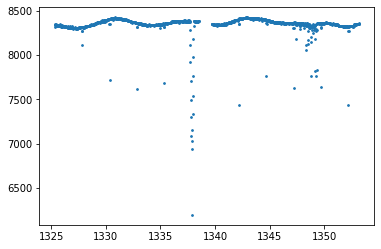

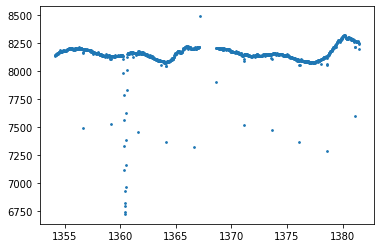

In [320]:
hdul1 = fits.open(cand1)

hdul1.info()
hdul1[0].header
hdul1[2].header
dataset = hdul1[1].data
flux1 = dataset['FLUX_RAW']
flux1_err = dataset['FLUX_RAW_ERR']
fluxbkg = dataset['FLUX_BKG']
time1 = dataset['TIME']
sect = hdul1[0].header['SECTOR']
camera = hdul1[0].header['CAMERA']
CCD = hdul1[0].header['CCD']
aperture = hdul1[3].data
quad = dataset['QUALITY']
pix_quad = dataset['PIXEL_QUALITY']
cado = dataset['CADENCENO']
cent1 = dataset['MOM_CENTR1']
cent2 = dataset['MOM_CENTR2']
plt.scatter(time1,flux1, s=3)
plt.show()


hdul2 = fits.open(cand2)
dataset = hdul2[1].data
flux2 = dataset['FLUX_RAW']
flux2_err = dataset['FLUX_RAW_ERR']
fluxbkg2 = dataset['FLUX_BKG']
time2 = dataset['TIME']
sect = hdul2[0].header['SECTOR']
camera = hdul2[0].header['CAMERA']
CCD = hdul2[0].header['CCD']
aperture2 = hdul2[3].data
quad2 = dataset['QUALITY']
pix_quad2 = dataset['PIXEL_QUALITY']
cado2 = dataset['CADENCENO']
cent12 = dataset['MOM_CENTR1']
cent22 = dataset['MOM_CENTR2']


plt.scatter(time2,flux2, s=3)
plt.show()

In [225]:
hdul1[1].columns.names

['TIME',
 'TIMECORR',
 'CADENCENO',
 'FLUX_RAW',
 'FLUX_RAW_ERR',
 'FLUX_BKG',
 'FLUX_CORR',
 'FLUX_CORR_ERR',
 'QUALITY',
 'PIXEL_QUALITY',
 'MOM_CENTR1',
 'MOM_CENTR2',
 'POS_CORR1',
 'POS_CORR2']

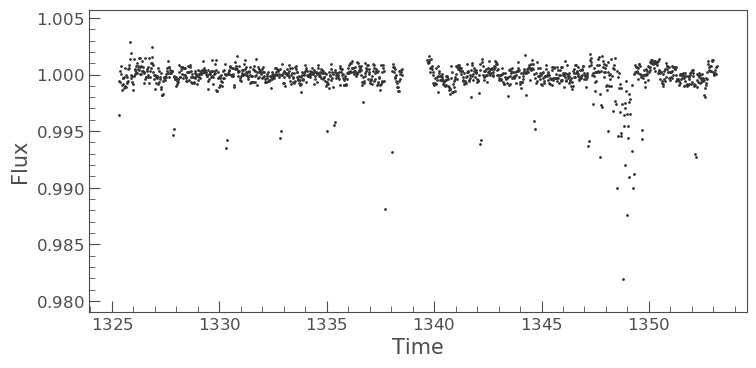

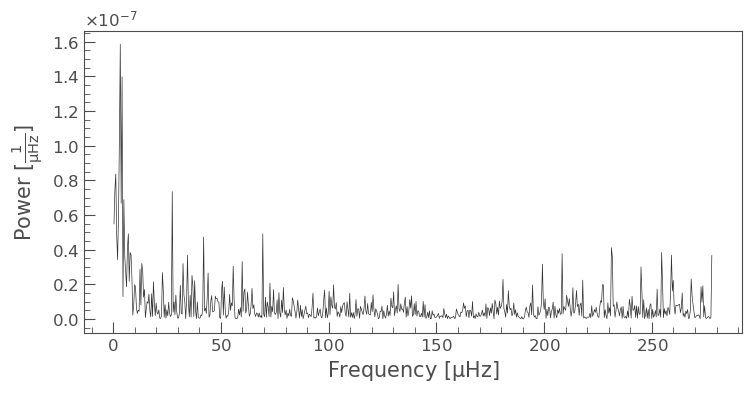

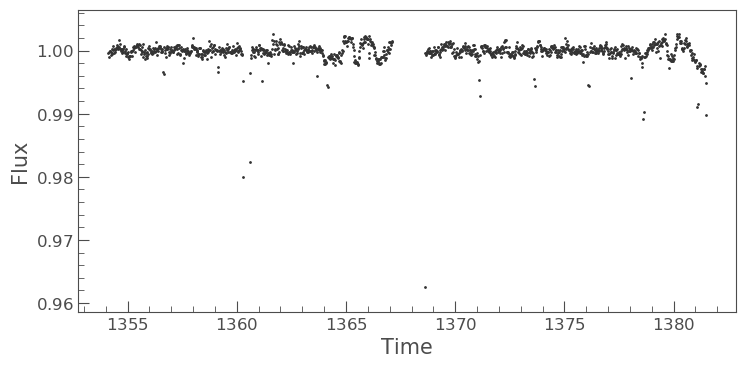

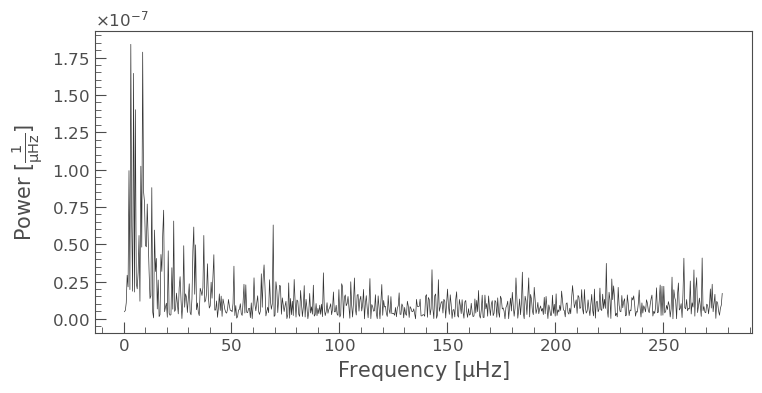

(2, 1282)


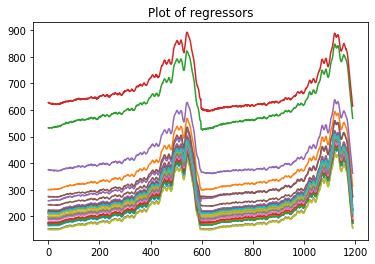

regressor DesignMatrix (2, 1282)


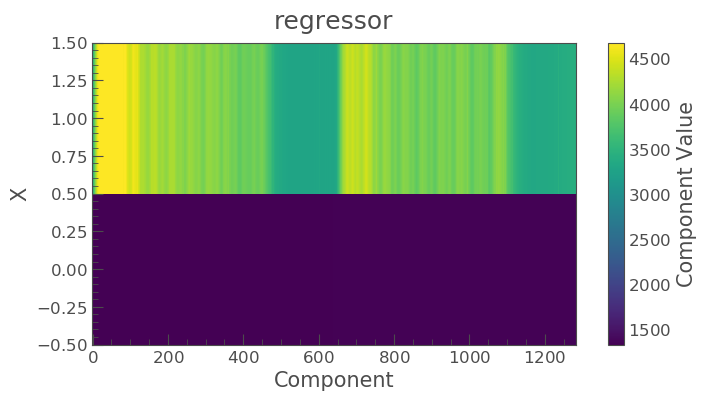

ValueError: too many values to unpack (expected 4)

In [369]:
model1 = lk.LightCurve(time1,flux1).remove_nans().remove_outliers().flatten(window_length=145)
model1.scatter()
plt.show()
power1 = model1.to_periodogram(method='lombscargle', normalization="psd")
power1.plot()
plt.show()

model2 = lk.LightCurve(time2,flux2).remove_nans().remove_outliers().flatten(window_length=145)
model2.scatter()
plt.show()
power2 = model2.to_periodogram(method='lombscargle', normalization="psd")
power2.plot()
plt.show()

#Need to detrend the lightcurve against predicted vectors of systematic noise 
#Linear regression can be a way to estimate the scatter/noise 
#begin with taking the aperture and using the "flux" outside of the aperature and assuming it is noise
#and does not hold true signal flux. 
#first is to create the regressors which need to be in matrix form with time and 'unwanted' flux
#then create the Design matrix to use for linear regression
#then complete linear regression to find best fitted model and determine outliners we can deem noise
#correct lightcurve based on the noise

totalflux = flux1 + fluxbkg

#Determine the set of regressors
regressor = [time1,fluxbkg] #correct for regressors?
regressor = np.array(regressor)
print(np.shape(regressor))

plt.plot(regressors[:,:30]) #correct shape for regressors
plt.title('Plot of regressors')
plt.show()


#create the design matrix of regressors
#df = [time1, flux1, fluxbkg]
df = pd.DataFrame(data = regressor)
dmatrix = lk.DesignMatrix(df, name='regressor')
print(dmatrix)
dmatrix.plot()
plt.show()
#Reduce the number of matricies to make sure to not cut needed signal
dmatrix = dmatrix.pca()

#Now employ linear regression / least-squares regression
#Using method from prior exercise for linear regression 
slope, interc, r_value, p_value, std_dev = st.linregress(time1, regressor)
print('Slope and intercept:', slope, interc)
print('sigma:',std_dev)
model_eq = np.poly1d([slope,interc])

#Test the model with the data
y_values = model_eq(time1)
y_values = np.array(y_values)
plt.plot(time1, y_values, color = 'purple')
plt.scatter(time1,flux1, s=3)
plt.title('Regular plots of both datasets')
plt.show()

#now subtract the new model from previous model since the noise is additive in the flux

#condition = ((time1 > 1347) & (time1 < 1350))
#reduced_flux[condition] = np.nan
regression_lc = lk.LightCurve(time1,y_values).remove_nans().remove_outliers().flatten(window_length=145)
reduced_lc.scatter()
plt.title('Regression lightcurve')
corrected_lc = model1 - regression_lc
corrected_lc.scatter()
#Now test for diff in power spectrum
power_reduced = corrected_lc.to_periodogram(method='lombscargle', normalization="psd")
power_reduced.plot()

#THis does not work quite like it is needed
